# Animating radar data

Here I read in the raster data and visualize them. I then stich the images together into an animated gif and save it to disk.

In [21]:
import rasterio as rast
from rasterio.plot import show
from rasterio.transform import Affine
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import imageio as io
import os

try:
    get_ipython().run_line_magic("matplotlib inline")
except:
    pl.ion()

Reading in a raster.

In [22]:
indir1 = "/home/devingoodsman/Desktop/MPB Doppler/July262005rasters/200507262050~~DOPVOL1_A:URP:XPG:RADAR:IRIS"
r1 = rast.open(indir1)
dBZ1 = r1.read(1)
Vel1 = r1.read(2)
Width1 = r1.read(3)
r1.crs
r1.close()

Rasterio has a bug where the raster appears to be flipped relative to how it should look (https://github.com/rasterio/rasterio/issues/1683). This can be seen by calling r1.bounds() below. This problem can be fixed with an affine transformation and a flip of the data.

(-223.60401687724516, -224.77094603469595)
BoundingBox(left=1312774.8442554963, bottom=1073155.35397859, right=1089170.8273782511, top=848384.4079438943)


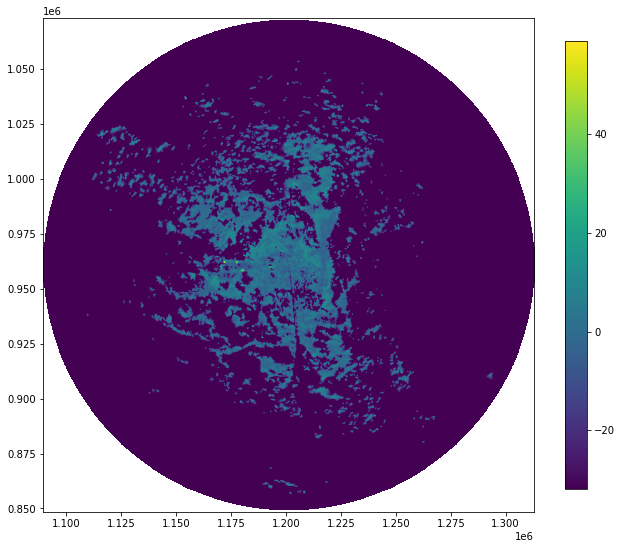

In [23]:
# plotting the raster
print(r1.res)
print(r1.bounds)
resx = r1.res[0]
resy = r1.res[1]
x0 = r1.bounds[2]
y0 = r1.bounds[1]
transform1 = Affine.translation(x0 - resx / 2, y0 - resy / 2) * Affine.scale(-resx, resy)
fig, ax = pl.subplots(figsize=(11, 11))
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(np.flip(dBZ1))

# plot on the same axis with rast.plot.show
im = rast.plot.show(np.flip(dBZ1), transform=transform1, ax=ax)
fig.colorbar(image_hidden, ax=ax, shrink = 0.75)

The other two bands of the raster can be plotted as follows:

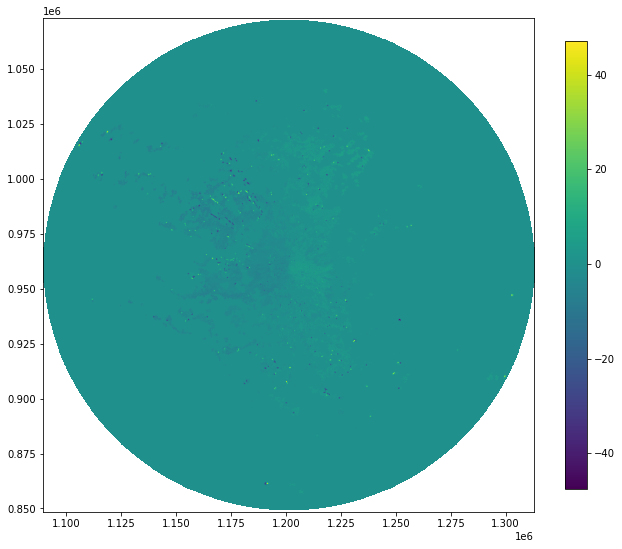

In [24]:
fig, ax = pl.subplots(figsize=(11, 11))
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(np.flip(Vel1))

# plot on the same axis with rast.plot.show
im = rast.plot.show(np.flip(Vel1), transform=transform1, ax=ax)
fig.colorbar(image_hidden, ax=ax, shrink = 0.75)

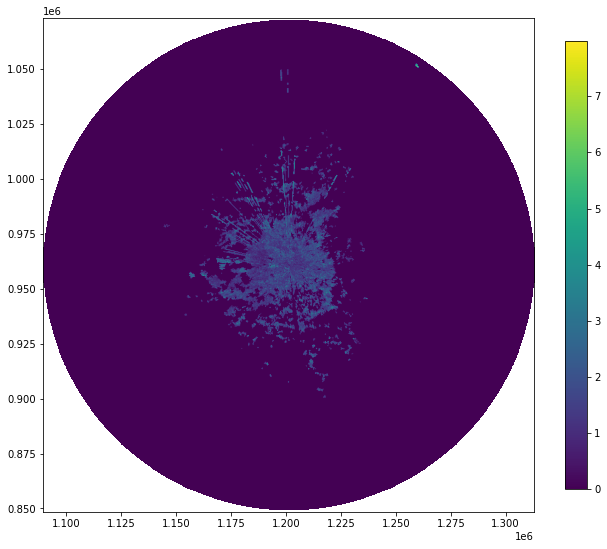

In [25]:
fig, ax = pl.subplots(figsize=(11, 11))
# use imshow so that we have something to map the colorbar to
image_hidden = ax.imshow(np.flip(Width1))

# plot on the same axis with rast.plot.show
im = rast.plot.show(np.flip(Width1), transform=transform1, ax=ax)
fig.colorbar(image_hidden, ax=ax, shrink = 0.75)

## Animating the dBZ data

In [26]:
# Looking at the rasters available in the input folder
dirpath = "/home/devingoodsman/Desktop/MPB Doppler/July262005rasters/"
os.listdir(dirpath)

['200507261520~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261530~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261540~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261550~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261600~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261610~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261620~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261630~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261640~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261650~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261700~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261710~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261720~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261730~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261740~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261750~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261800~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261810~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261820~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261830~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '200507261840~~DOPVOL1_A:URP:XPG:RADAR:IRIS',
 '20050726185

In [27]:
# Making a file list that can be iterated.
filelist = os.listdir(dirpath)
print(filelist[0])

200507261520~~DOPVOL1_A:URP:XPG:RADAR:IRIS


In [28]:
# Notice that the first file in the list is not the first chronological file so I will sort the list
filelist = np.sort(filelist)
print(filelist[0])

200507261500~~DOPVOL1_A:URP:XPG:RADAR:IRIS


In [39]:
# initialize with the first image in the sequence.
dirpath = "/home/devingoodsman/Desktop/MPB Doppler/July262005rasters/"

images = []
for i in range(len(filelist)):
    # reading in the data
    filepath = dirpath + filelist[i]
    r1 = rast.open(filepath)
    dBZ1 = r1.read(1)
    r1.close()

    # converting the image to unsigned 8-bit integer.
    # This particular conversion is designed to ensure that 
    # the relative numbers all numbers are correct relative to 
    # one another.
    dBZ1int = np.rint((dBZ1 + 32.01)/(32.01 + 66.0)*256)
    dBZ1int = dBZ1int.astype(dtype = np.uint8)

    images.append(np.flip(dBZ1int))

# saving gif to disk    
outdir1 = dirpath + "DBZanimatedJuly262005.gif"
io.mimsave(outdir1, images)